In [1]:
%matplotlib inline

In [17]:
import pandas as pd
import astropy as ap
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from glob import glob
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
mpl.style.use('/home/apizzuto/Nova/scripts/novae_plots.mplstyle')
mpl.rcParams['figure.dpi'] = 120
data_base = '/data/user/mlarson/combo_r129072/scripts/greco_online/skylab_dataset/v2/dataset_scripts/all_fields/'

In [3]:
data_files = glob(data_base + '*data.npy')
nue = np.load(data_base + 'IC86_2012.nue.npy')
numu = np.load(data_base + 'IC86_2012.numu.npy')
nutau = np.load(data_base + 'IC86_2012.nutau.npy')

In [4]:
for year in sorted(data_files):
    data = np.load(year)
    zero_en = np.count_nonzero(data['logE'] == -np.inf)
    print "Year : {}\t Events: {}\t zero en: {}\t Fraction: {:.4f}".format(year[-13:-9], 
                                                len(data), zero_en, float(zero_en) / len(data))

Year : 2012	 Events: 127818	 zero en: 1362	 Fraction: 0.0107
Year : 2013	 Events: 134392	 zero en: 1516	 Fraction: 0.0113
Year : 2014	 Events: 140079	 zero en: 1524	 Fraction: 0.0109
Year : 2015	 Events: 143126	 zero en: 1590	 Fraction: 0.0111
Year : 2016	 Events: 140057	 zero en: 1463	 Fraction: 0.0104
Year : 2017	 Events: 159983	 zero en: 1766	 Fraction: 0.0110
Year : 2018	 Events: 134405	 zero en: 1428	 Fraction: 0.0106


In [5]:
print data.dtype.names

('run', 'event', 'subevent', 'nstring', 'nchannel', 'time', 'ra', 'dec', 'azi', 'zen', 'angErr', 'logE', 'cascade_energy', 'monopod_azi', 'monopod_zen', 'pidDeltaLLH', 'pidPeglegLLH', 'pidMonopodLLH', 'pidLength', 'vonmises_norm', 'vonmises_sigma', 'kent_norm', 'kent_sigma', 'kent_beta', 'kent_theta', 'dkent_norm1', 'dkent_sigma1', 'dkent_beta1', 'dkent_theta1', 'dkent_norm2', 'dkent_sigma2', 'dkent_beta2', 'dkent_theta2', 'dkent_azimuth', 'dkent_zenith')


In [6]:
for flav, name in [(nue, 'nue'), (numu, 'numu'), (nutau,'nutau')]:
    zero_en = np.count_nonzero(flav['logE'] == -np.inf)
    print "Flavor : {}\t Events: {}\t zero en: {}\t Fraction: {:.4f}".format(name, 
                                                len(flav), zero_en, float(zero_en) / len(flav))

Flavor : nue	 Events: 344689	 zero en: 1731	 Fraction: 0.0050
Flavor : numu	 Events: 290879	 zero en: 1548	 Fraction: 0.0053
Flavor : nutau	 Events: 607535	 zero en: 3210	 Fraction: 0.0053


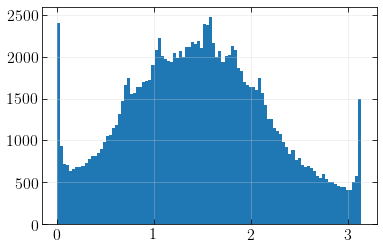

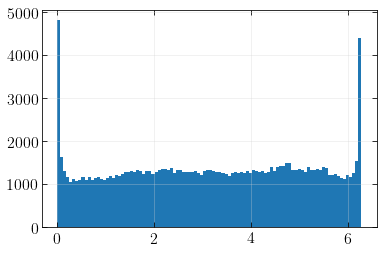

In [7]:
plt.hist(data['monopod_azi'], bins = 100)
plt.show()

plt.hist(data['monopod_zen'], bins=100)
plt.show()

In [8]:
a = '/data/user/apizzuto/Nova/GRECO_Skylab_Dataset/IC86_2012.data.npy'
a[:-4]

'/data/user/apizzuto/Nova/GRECO_Skylab_Dataset/IC86_2012.data'

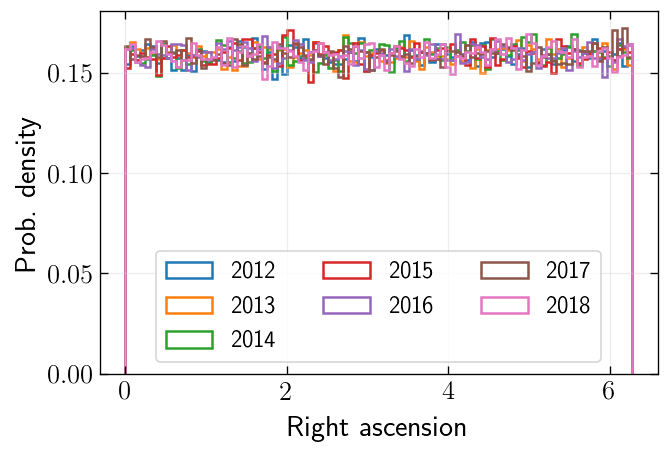

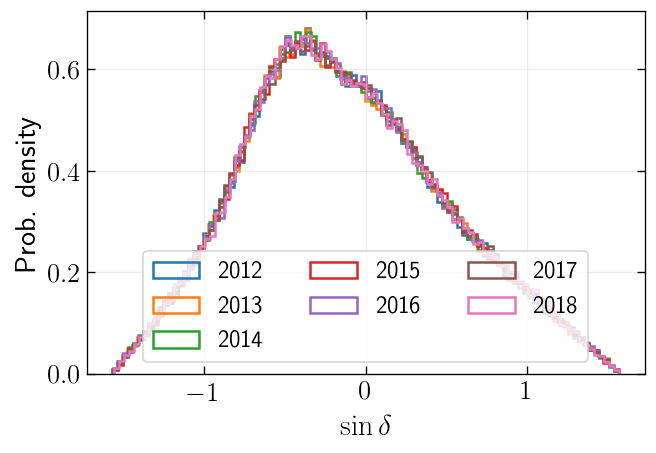

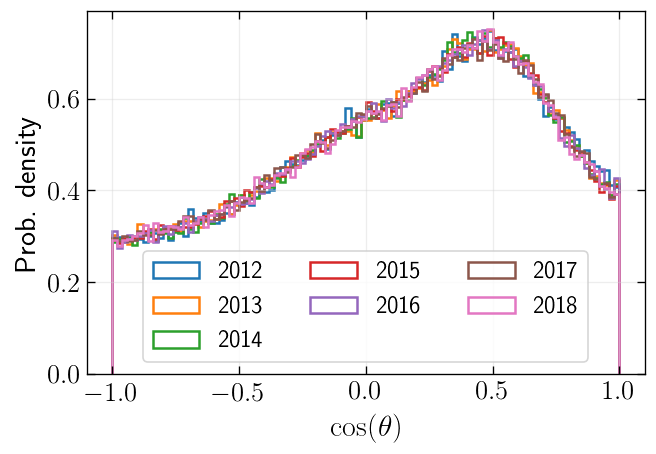

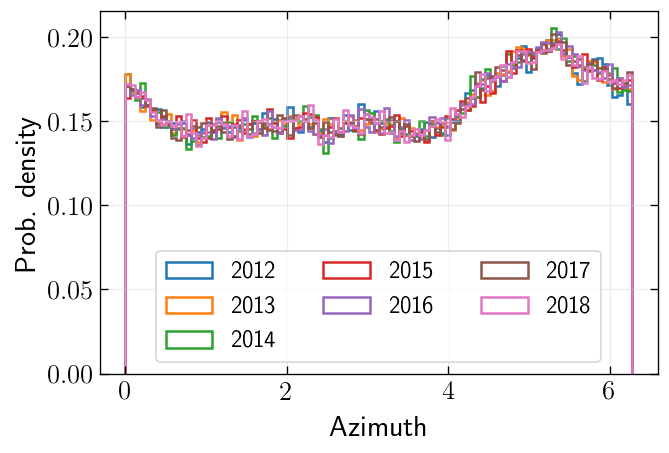

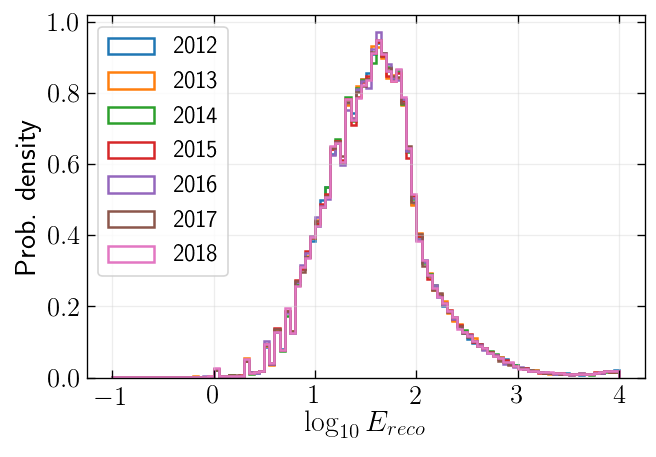

In [20]:
for year in sorted(data_files):
    data = np.load(year)
    plt.hist(data['ra'], histtype = 'step', lw = 1.5, label = year[-13:-9], density=True, bins = 100)
plt.xlabel('Right ascension')
plt.ylabel('Prob. density')
plt.legend(loc=8, ncol=3, fontsize = 14)
plt.show()

for year in sorted(data_files):
    data = np.load(year)
    plt.hist(data['dec'], histtype = 'step', lw = 1.5, label = year[-13:-9], density=True, bins = 100)
plt.xlabel(r'$\sin \delta$')
plt.ylabel('Prob. density')
plt.legend(loc=8, ncol=3, fontsize = 14)
plt.show()

for year in sorted(data_files):
    data = np.load(year)
    plt.hist(np.cos(data['zen']), histtype = 'step', lw = 1.5, label = year[-13:-9], density=True, bins = 100)
plt.ylabel('Prob. density')
plt.xlabel(r'$\cos(\theta)$')
plt.legend(loc=8, ncol=3, fontsize = 14)
plt.show()

for year in sorted(data_files):
    data = np.load(year)
    plt.hist(data['azi'], histtype = 'step', lw = 1.5, label = year[-13:-9], density=True, bins = 100)
plt.ylabel('Prob. density')
plt.xlabel('Azimuth')
plt.legend(loc=8, ncol=3, fontsize = 14)
plt.show()

for year in sorted(data_files):
    data = np.load(year)
    msk = data['logE'] == -np.inf
    plt.hist(data['logE'][~msk], histtype = 'step', lw = 1.5, 
             label = year[-13:-9], density=True, bins = np.linspace(-1., 4., 101))
plt.ylabel('Prob. density')
plt.xlabel(r'$\log_{10}E_{reco}$')
plt.legend(loc=2, ncol=1, fontsize = 14)
plt.show()

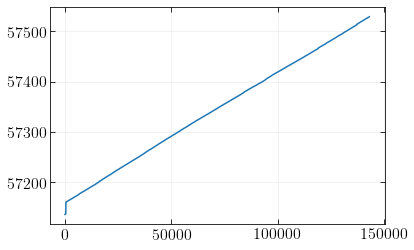

In [15]:
plt.plot(data['time'])

In [30]:
from icecube import astro

In [21]:
import sys
sys.path.append('/home/apizzuto/Nova/scripts/')
from load_model import *

In [6]:
forest = load_model()

In [26]:
data = clean_data(np.load('/data/user/apizzuto/Nova/GRECO_Skylab_Dataset/IC86_2012.data_with_delta_psi.npy'))
df = pd.DataFrame(np.load('/data/user/apizzuto/Nova/GRECO_Skylab_Dataset/IC86_2012.data_with_delta_psi.npy'))
df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
predictions = predict_from_model(data, model=forest)
df['angErr'] = predictions


In [39]:
data_files = data_files = glob('/data/user/apizzuto/Nova/GRECO_Skylab_Dataset/*data_with_angErr.npy')
df = pd.DataFrame(np.load(data_files[0]))
for year in data_files[1:]:
    data = np.load(year)
    df = df.append(pd.DataFrame(data))

In [40]:
df.columns

Index([u'index', u'run', u'event', u'subevent', u'nstring', u'nchannel',
       u'time', u'ra', u'dec', u'azi', u'zen', u'angErr', u'logE',
       u'cascade_energy', u'monopod_azi', u'monopod_zen', u'pidDeltaLLH',
       u'pidPeglegLLH', u'pidMonopodLLH', u'pidLength', u'vonmises_norm',
       u'vonmises_sigma', u'kent_norm', u'kent_sigma', u'kent_beta',
       u'kent_theta', u'dkent_norm1', u'dkent_sigma1', u'dkent_beta1',
       u'dkent_theta1', u'dkent_norm2', u'dkent_sigma2', u'dkent_beta2',
       u'dkent_theta2', u'dkent_azimuth', u'dkent_zenith', u'monopod_ra',
       u'monopod_dec', u'monopod_pegleg_dpsi'],
      dtype='object')

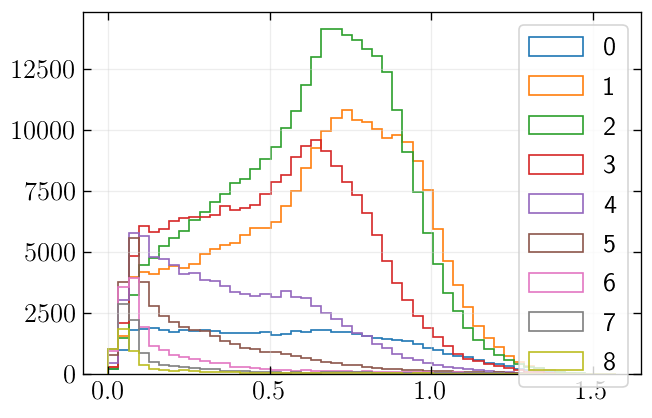

In [41]:
for nst in [0, 1, 2, 3, 4, 5, 6, 7, 8]:
    msk = df['nstring'] == nst
    plt.hist(df['angErr'][msk], histtype = 'step', bins = np.linspace(0., np.pi/2, 51),
            label = str(nst))
    
plt.legend()

/home/apizzuto/.venvs/nova/lib/python2.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


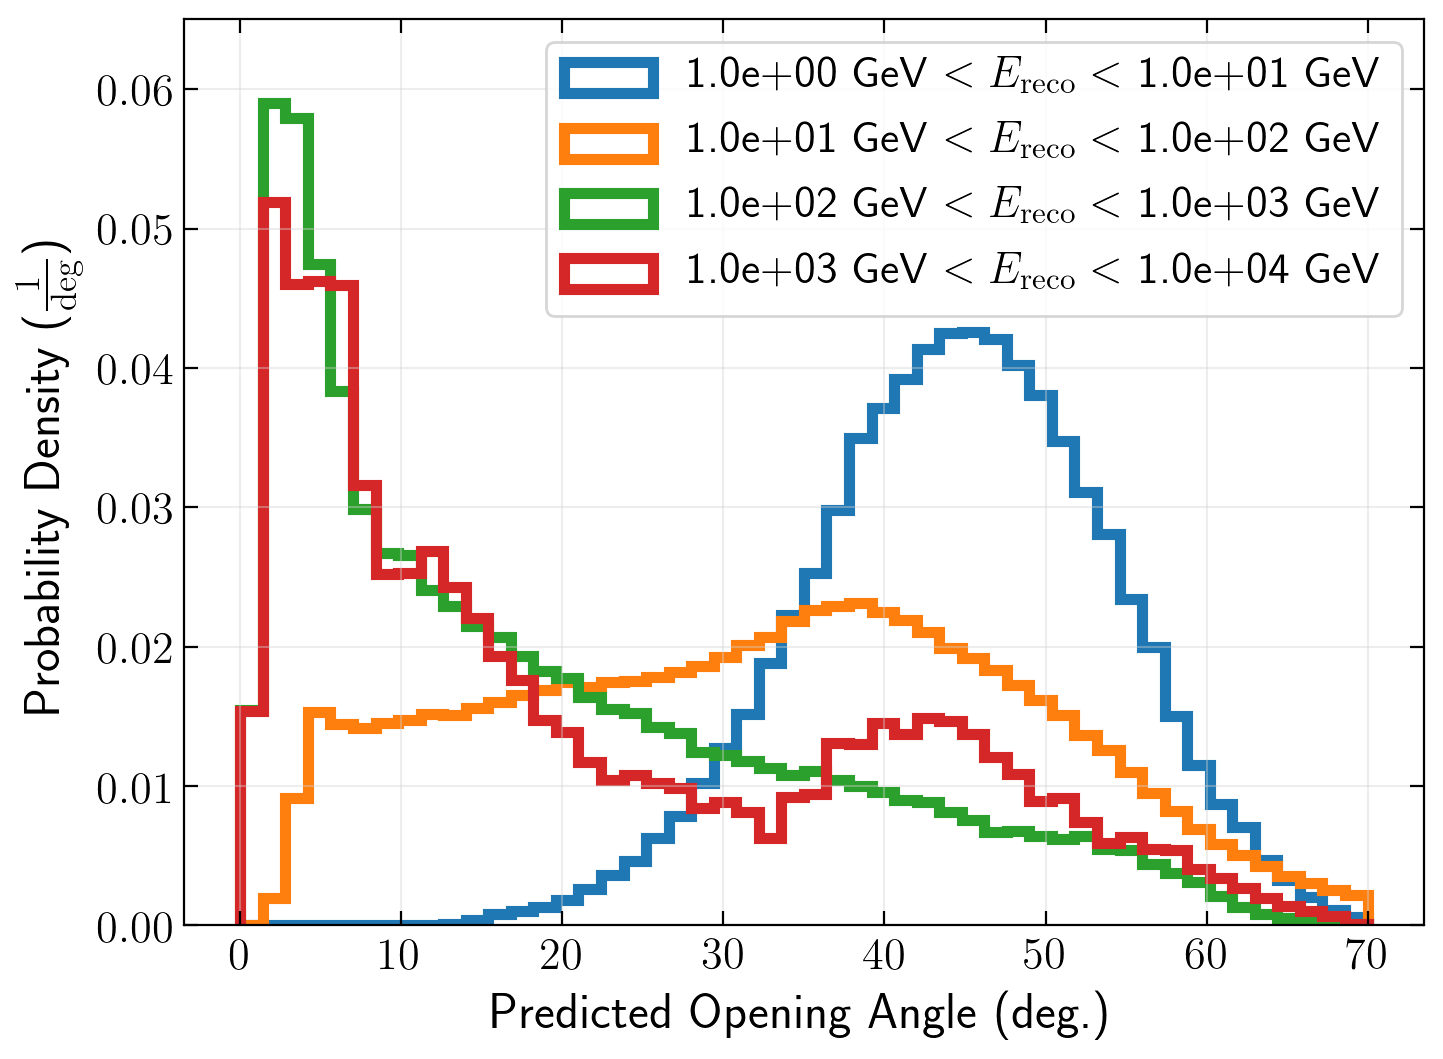

In [42]:
nu_df = df

fig, ax = plt.subplots(figsize = (8,6), dpi=200)

e_bins = np.linspace(0., 4., 5)
for le, re in zip(e_bins[:-1], e_bins[1:]):
    msk = nu_df['logE'] < re
    msk *= nu_df['logE'] > le
    plt.hist(nu_df['angErr'][msk]*180. / np.pi, bins = np.linspace(0., 70., 51), 
             density=True, linewidth = 4., histtype='step',
            label = '{:.1e} GeV '.format(10.**le) + r'$< E_{\mathrm{reco}} < $' + ' {:.1e} GeV'.format(10.**re))
    
plt.legend(loc = 1, ncol = 1)
plt.ylabel(r'Probability Density ($\frac{1}{\mathrm{deg}}$)')
plt.xlabel(r'Predicted Opening Angle (deg.)')
plt.ylim(0.00, 0.065)
plt.show()

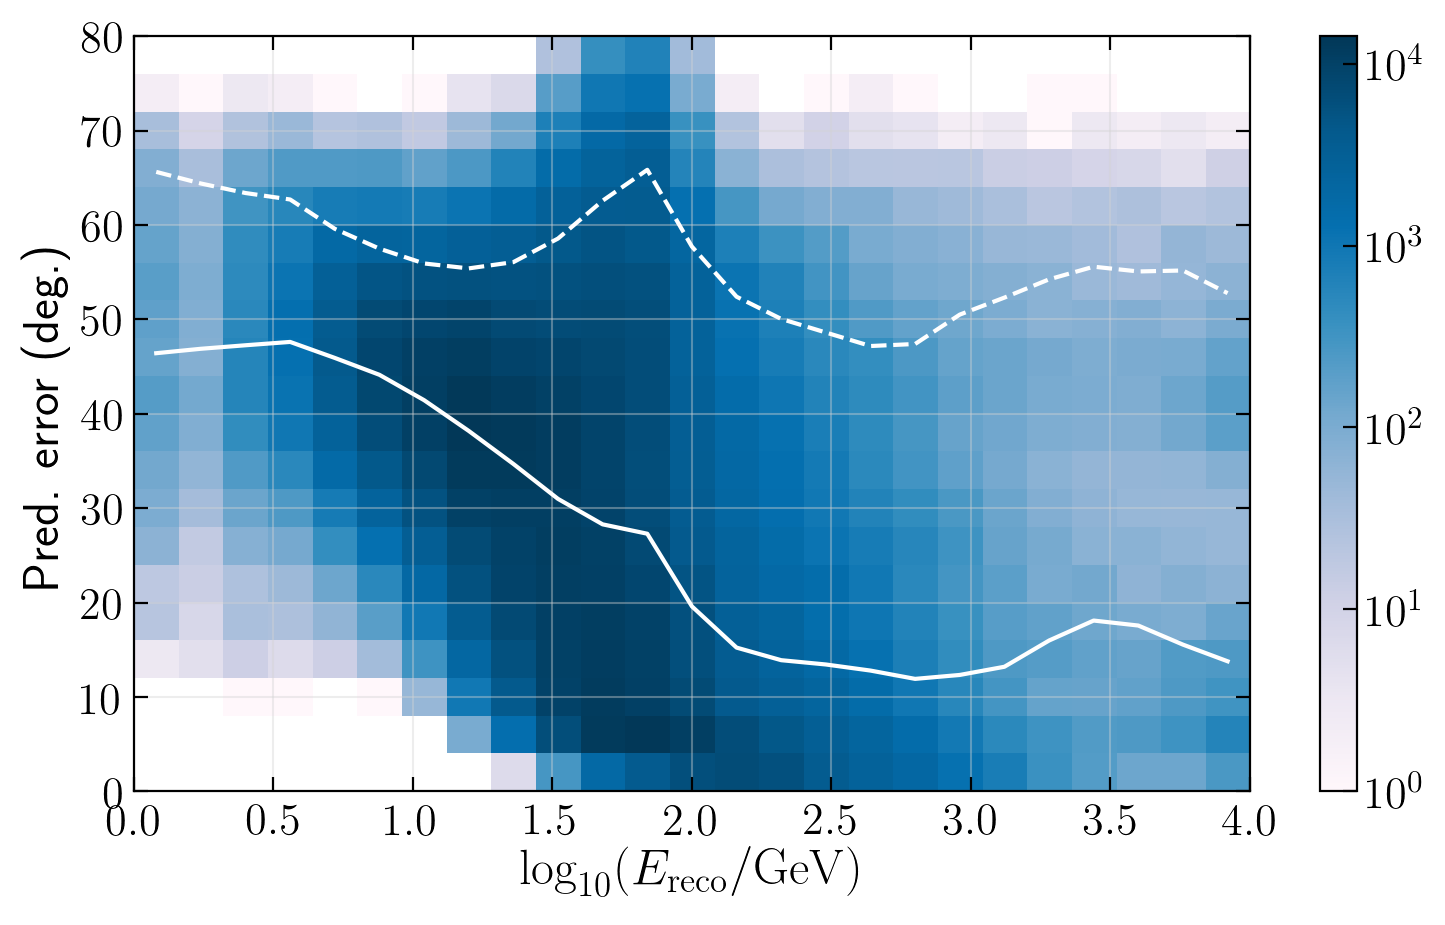

In [43]:
from matplotlib.colors import LogNorm

def mids(arr):
    return arr[:-1] + (np.diff(arr) / 2.)

f = plt.figure(figsize = (9, 5), dpi=200)
f.set_facecolor('w')
ax = f.add_subplot(111)

e_bins = np.logspace(0., 4., 26)
meds = []
ninetyfive = []
for le, re in zip(e_bins[:-1], e_bins[1:]):
    msk = nu_df['logE'] < np.log10(re)
    msk *= nu_df['logE'] > np.log10(le)
    meds.append(np.median(nu_df['angErr'][msk])*180. / np.pi)
    ninetyfive.append(np.percentile(nu_df['angErr'][msk] * 180. / np.pi, 95.))

cax = plt.hist2d(nu_df['logE'], nu_df['angErr'] * 180. / np.pi, 
               bins=[np.log10(e_bins), np.linspace(0., 80., 21)],
          norm=LogNorm())
plt.colorbar(cax[3], ax=ax, ticks=[1, 1e1, 1e2, 1e3, 1e4])
plt.plot(mids(np.log10(e_bins)), meds, color = 'w')
plt.plot(mids(np.log10(e_bins)), ninetyfive, color = 'w', ls= '--')
plt.xlabel(r'$\log_{10}(E_{\mathrm{reco}} / \mathrm{GeV})$')
plt.ylabel(r'Pred. error (deg.)')
plt.show()

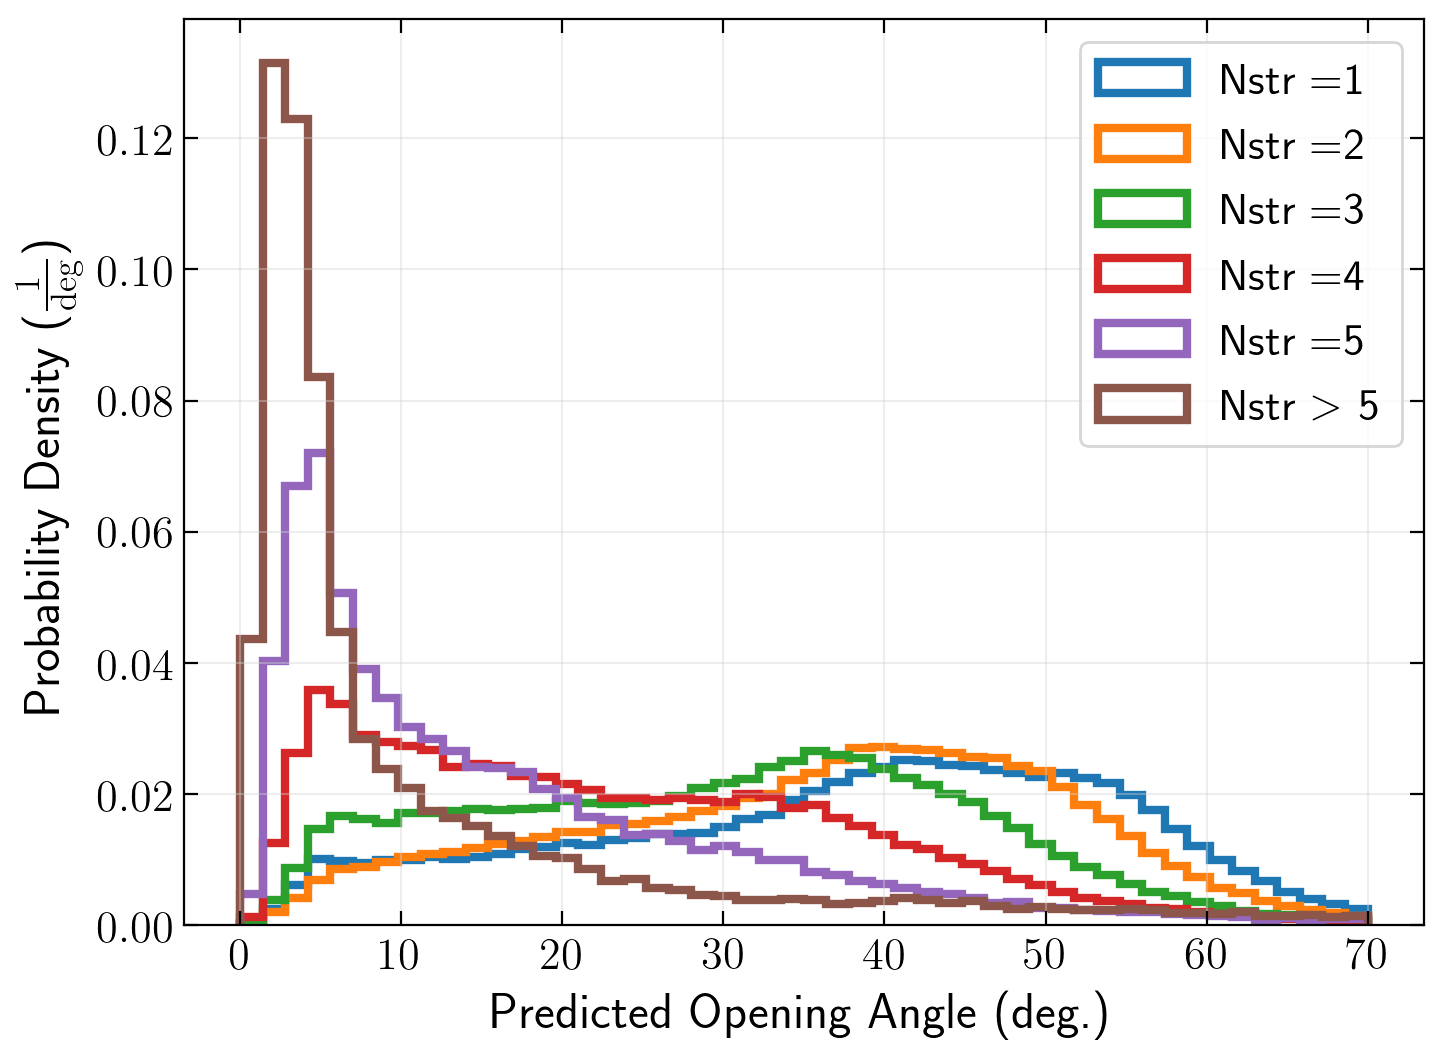

In [44]:
fig, ax = plt.subplots(figsize = (8,6), dpi=200)

nstrings = [1, 2, 3, 4, 5]
for nstr in nstrings:
    msk = nu_df['nstring'] == nstr
    plt.hist(nu_df['angErr'][msk]*180. / np.pi, bins = np.linspace(0., 70., 51), density=True, 
             linewidth = 3., histtype='step', label = r'Nstr $=$' + r'{}'.format(nstr))
    
msk = nu_df['nstring'] > 5
plt.hist(nu_df['angErr'][msk]*180. / np.pi, bins = np.linspace(0., 70., 51), density=True, 
             linewidth = 3., histtype='step', label = r'Nstr $>$ 5')

plt.legend(loc = 1, ncol = 1)
plt.ylabel(r'Probability Density ($\frac{1}{\mathrm{deg}}$)')
plt.xlabel(r'Predicted Opening Angle (deg.)')
plt.show()

In [9]:
len(data)

126456

0.5519449532076196


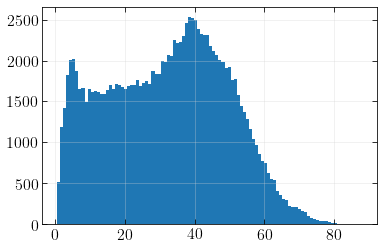

In [13]:
plt.hist(predictions * 180. / np.pi, bins = 100)
print np.min(predictions*180. / np.pi)
plt.show()

In [23]:
126456. - 127818.

-1362.0

In [46]:
?np.random.choice

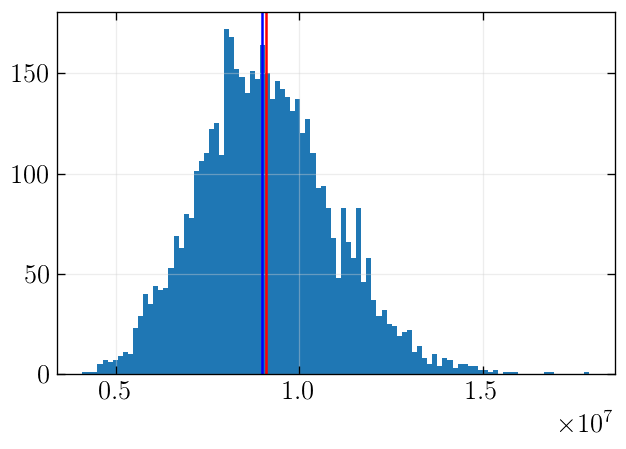

In [55]:
mu = 3000
sigma = 300

a = np.random.randn(50000)*sigma + mu
b = np.random.choice(a, size = 5000)
b *= b

plt.hist(b, bins = 100)
plt.axvline(mu**2, color = 'b')
plt.axvline(np.mean(b), color = 'r')
plt.show()

In [ ]:
np.mean(b)